In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('student_data.csv')
df.describe(include='all')

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
count,357.000000,357,357,357.000000,357,357,357,357.000000,357.000000,357,...,357,357,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
unique,NaN,2,2,NaN,2,2,2,NaN,NaN,5,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,GP,F,NaN,U,GT3,T,NaN,NaN,other,...,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,315,185,NaN,279,250,318,NaN,NaN,127,...,299,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,193.176471,NaN,NaN,16.655462,NaN,NaN,NaN,2.795518,2.546218,NaN,...,NaN,NaN,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.523810
std,115.771252,NaN,NaN,1.268262,NaN,NaN,NaN,1.093999,1.084217,NaN,...,NaN,NaN,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.227797
min,0.000000,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,...,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000
25%,89.000000,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,...,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000
50%,196.000000,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,3.000000,NaN,...,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,292.000000,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,...,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000


In [31]:
df_master = df.copy()

#On va transformer les valeurs binaires 'no' et 'yes' en 0 et 1 pour avoir une représentation graphique de la relation avec les notes.
df_master = df.set_index('StudentID')
yn_map = {'yes': 1, 'no': 0}

In [30]:
df_master = df_master.replace(yn_map)
df_master.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian
count,357,357,357,357,357,357,357,357,357
unique,2,2,2,2,2,5,5,4,3
top,GP,F,U,GT3,T,other,other,course,mother
freq,315,185,279,250,318,127,196,126,248


In [11]:
df_master.describe(include='number')

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,0.140056,0.613445,0.484594,0.504202,...,0.837535,0.313725,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.523810
std,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.347532,0.487644,0.500464,0.500684,...,0.369395,0.464657,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.227797
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [32]:
# On n'a pas besoin de remplir les valeurs manquantes. Toutes les caractéristiques sont complètes
df_master.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
FinalGrade    0
dtype: int64

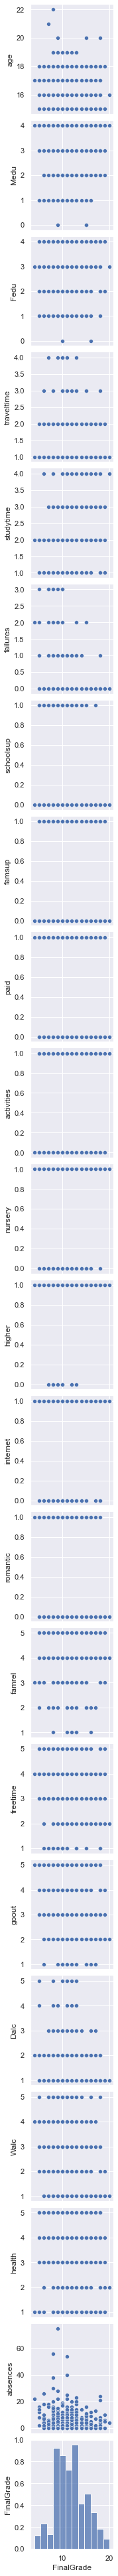

In [29]:
import seaborn as sns

# sns.set(rc={"figure.figsize":(2, 4)})
sns.pairplot(df_master, x_vars=['FinalGrade'])